# Отчёт по производительности для задания №3 (OpenMP)


In [1]:
import re
import pandas as pd
from pathlib import Path

text = Path("../Results/3_log.txt").read_text(encoding="utf-8")

interval_re = re.compile(r"Interval:\s*\[0,\s*([\d.e+-]+)\],\s*N\s*=\s*([\d.e+-]+)")
threads_re = re.compile(r"Threads:\s*(\d+)")
time_re = re.compile(r"Time:\s*([\d.]+)\s*ms\s*\(speedup:\s*([\d.]+)x,\s*efficiency:\s*([\d.]+)\)")

records = []
current_N = None
lines = text.splitlines()

i = 0
while i < len(lines):
    line = lines[i].strip()

    m_interval = interval_re.search(line)
    if m_interval:
        b_str = m_interval.group(1)
        n_str = m_interval.group(2)
        try:
            current_N = int(float(n_str))
        except:
            current_N = int(float(b_str))
        i += 1
        continue

    m_threads = threads_re.search(line)
    if m_threads:
        threads = int(m_threads.group(1))
        i += 1
        if i < len(lines):
            time_line = lines[i].strip()
            m_time = time_re.search(time_line)
            if m_time:
                time_ms = float(m_time.group(1))
                speedup = float(m_time.group(2))
                efficiency = float(m_time.group(3))
                records.append({
                    'N': current_N,
                    'threads': threads,
                    'time_ms': time_ms,
                    'speedup': speedup,
                    'efficiency': efficiency
                })
        continue

    i += 1

df = pd.DataFrame(records)
print(f"Rows: {len(df)}")
df

Rows: 36


,N,threads,time_ms,speedup,efficiency
0,1000,1,0.351569,1.000000,1.000000
1,1000,2,0.040278,8.728630,4.364320
2,1000,4,0.034917,10.068800,2.517200
3,1000,6,0.066792,5.263670,0.877278
4,1000,8,0.139778,2.515200,0.314400
5,1000,12,0.138486,2.538650,0.211555
6,10000,1,0.084139,1.000000,1.000000
7,10000,2,0.039417,2.134600,1.067300
8,10000,4,0.034542,2.435870,0.608967
9,10000,6,0.099361,0.846801,0.141134


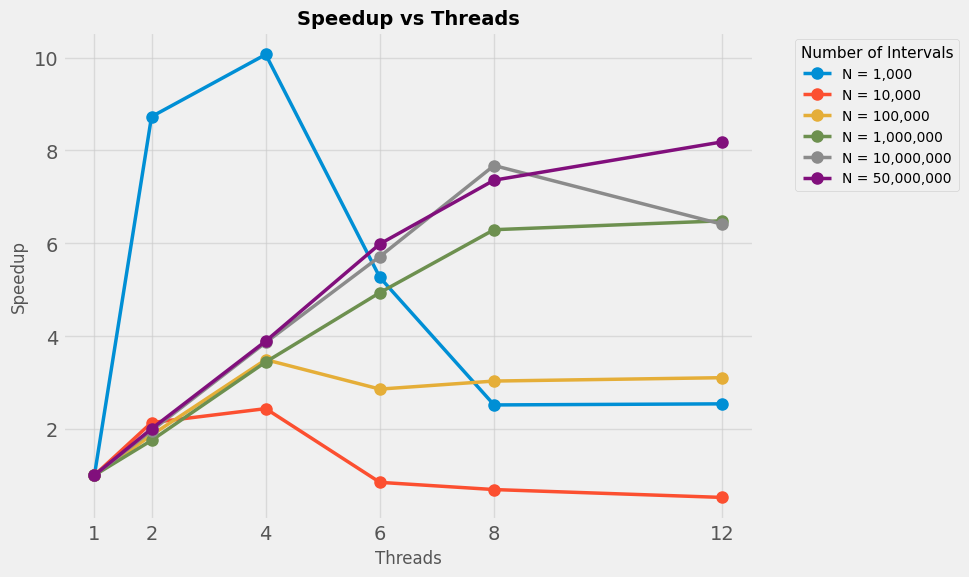

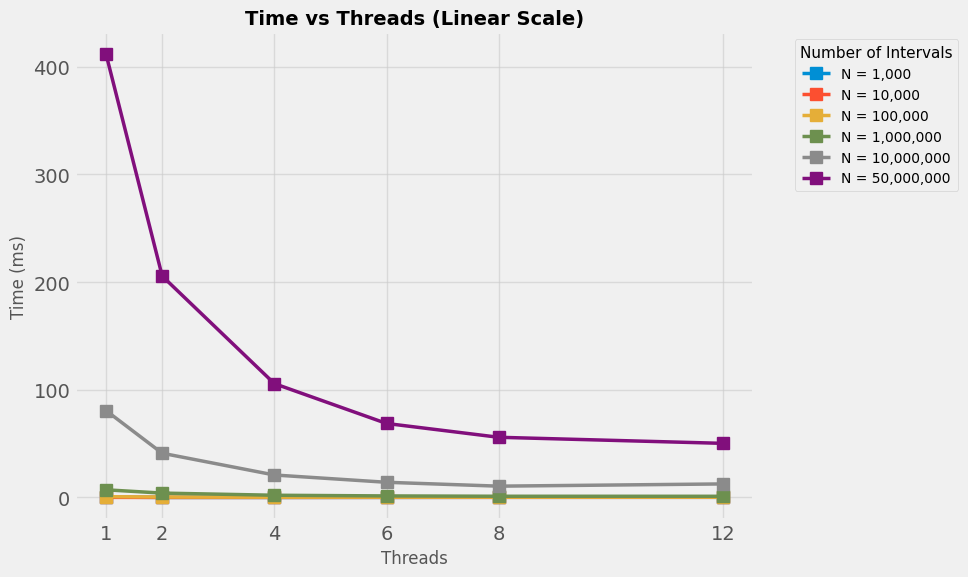

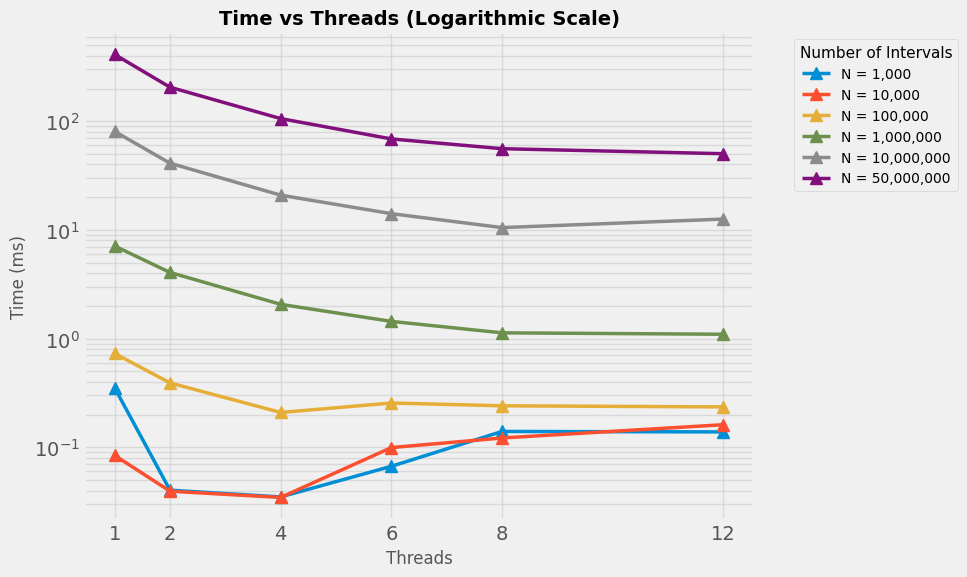

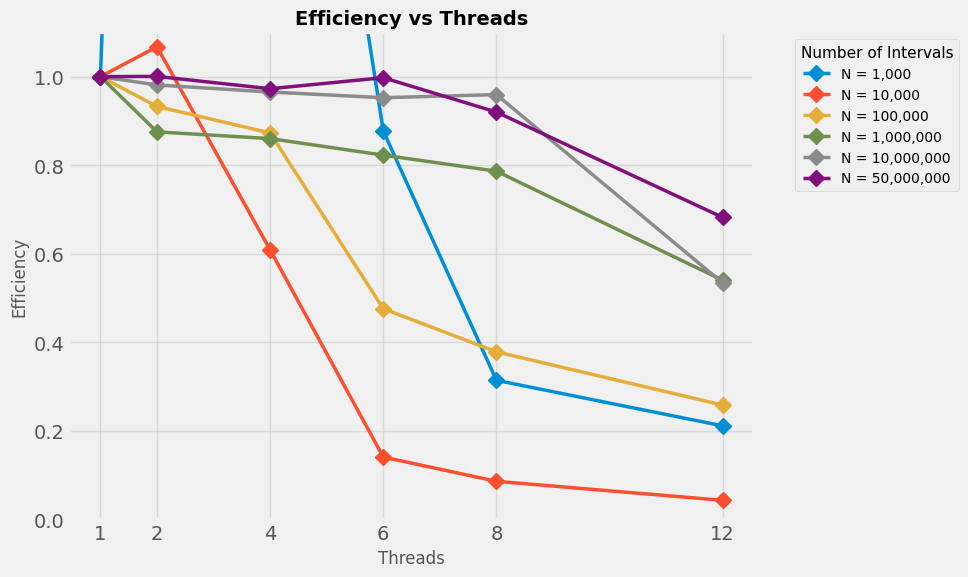

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Ns = sorted(df['N'].unique())
threads = sorted(df['threads'].unique())

# 1) Speedup vs Threads 
plt.figure(figsize=(10, 6))
for n in Ns:
    sub = df[df['N'] == n].sort_values('threads')
    plt.plot(sub['threads'], sub['speedup'], 'o-', linewidth=2.5, markersize=8, label=f'N = {n:,}')


plt.title('Speedup vs Threads', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.grid(True, alpha=0.6)
plt.xticks(threads)
plt.legend(title='Number of Intervals', title_fontsize=11, fontsize=10,
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2) Time vs Threads 
plt.figure(figsize=(10, 6))
for n in Ns:
    sub = df[df['N'] == n].sort_values('threads')
    plt.plot(sub['threads'], sub['time_ms'], 's-', linewidth=2.5, markersize=8, label=f'N = {n:,}')

plt.title('Time vs Threads (Linear Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Time (ms)', fontsize=12)
plt.grid(True, alpha=0.6)
plt.xticks(threads)
plt.legend(title='Number of Intervals', title_fontsize=11, fontsize=10,
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3) Time vs Threads 
plt.figure(figsize=(10, 6))
for n in Ns:
    sub = df[df['N'] == n].sort_values('threads')
    plt.plot(sub['threads'], sub['time_ms'], '^-', linewidth=2.5, markersize=8, label=f'N = {n:,}')

plt.title('Time vs Threads (Logarithmic Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Time (ms)', fontsize=12)
plt.yscale('log')
plt.grid(True, alpha=0.6, which='both')
plt.xticks(threads)
plt.legend(title='Number of Intervals', title_fontsize=11, fontsize=10,
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4) Efficiency vs Threads
plt.figure(figsize=(10, 6))
for n in Ns:
    sub = df[df['N'] == n].sort_values('threads')
    plt.plot(sub['threads'], sub['efficiency'], 'D-', linewidth=2.5, markersize=8, label=f'N = {n:,}')

plt.title('Efficiency vs Threads', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.grid(True, alpha=0.6)
plt.xticks(threads)
plt.ylim(bottom=0, top=1.1)
plt.legend(title='Number of Intervals', title_fontsize=11, fontsize=10,
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()